<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/week9(ANN)_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
số này là:  7


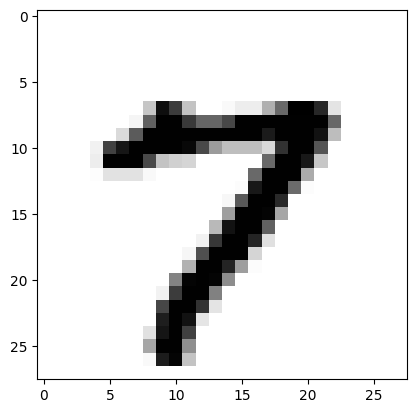

In [74]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print(train_images.shape)
hinh = train_images[5555]

plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('số này là: ', train_labels[5555])



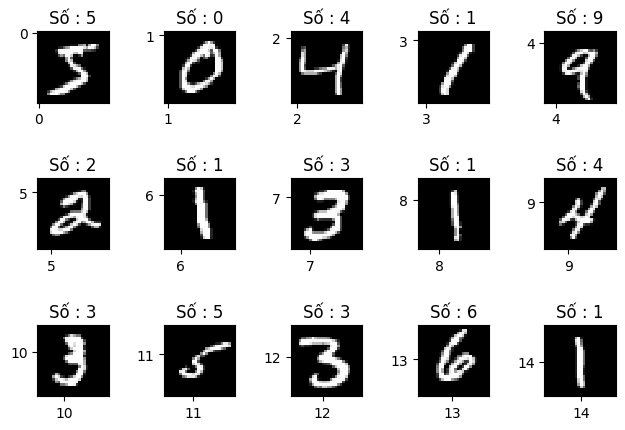

In [75]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation = 'none')
  plt.title('Số : {}'.format(train_labels[i]))
  plt.xticks([i])
  plt.yticks([i])



In [76]:

from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,))) #anh 28 cot x 28 
model.add(Dense(10,activation='softmax'))
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [77]:
X=test_images
Y=test_labels
train_images = train_images.reshape((60000,28*28)) # chuyen 60000 tam anh voi kich thuoc 28x28 thanh 1 cot 
train_images = train_images.astype('float32')/255 # dung kieu float de chuyen tu kieu [0:1] -> [0:255]
print(train_images.shape)
test_images = test_images.reshape((10000,28*28)) #thanh 1 hang
test_images = test_images.astype('float32')/255
print(test_images.shape)


(60000, 784)
(10000, 784)


In [78]:
from keras.utils import to_categorical #ham chuyen gia tri bit
train_labels = to_categorical (train_labels,10) #chuyen thanh 10 bit
print(train_labels.shape)
test_labels = to_categorical(test_labels,10)# //
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [79]:
#data->> model ->> bien dich(compile)->>train ->>evaluation 
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs =10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Do chinh xac tren tep kiem tra  :',test_acc)
print('Ham mat mat tren tep kiem tra:',test_loss)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2619 - accuracy: 0.9253
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1068 - accuracy: 0.9690
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0703 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0512 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0125 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.

số này là:  6


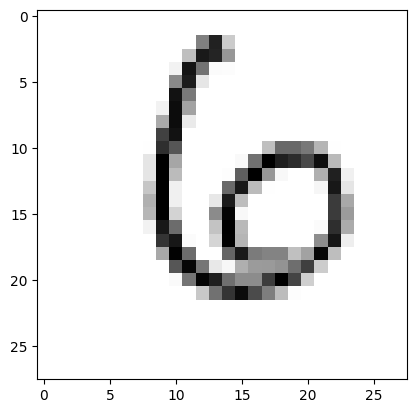

In [80]:
hinh = X[100]
plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('số này là: ', Y[100])


In [84]:
x_pred = X[100].reshape(1,28*28)
x_pred = x_pred.astype('int32')
y_pred=model.predict(x_pred)
print(y_pred)
np.argmax(model.predict(x_pred),axis=-1)


1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 20ms/step


array([6])